In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clr
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def oneNN(testPoints, dataPoints):
    """ Returns the closest point for each point"""
    distances = np.array([np.linalg.norm(dataPoints - tp, axis=1) for tp in testPoints])
    return distances.argmin(axis=0)

def kNN(k, testPoints, dataPoints, labels):
    distances = np.array([np.linalg.norm(dataPoints - tp, axis=1) for tp in testPoints])
    closest = np.array([labels[closer] for closer in distances.argsort()[:,:k]])
    return np.array([np.bincount(row).argmax() for row in closest])

In [3]:
# Define starting variables
points = 100
classes = 3
dimensions = 3

# Set number of centroids and define corresponding colors
centroids = 3
colors = ["red","green","blue"]

# Function that generates random data points (X), generates random centroids (C),
# computes distances and assigns labels (one for each data point)
def randomVars(points, dimensions, centroids):
    X = np.random.rand(points,dimensions)
    C = X[np.random.randint(points, size=dimensions),:]
    labels = oneNN(C, X)
    return X, C, labels

In [14]:
X, C, labels = randomVars(points, dimensions, centroids)
labels

array([0, 2, 2, 0, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 0,
       1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 0, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2,
       1, 0, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 0, 2, 1, 2, 1, 1, 1,
       1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2], dtype=int64)

In [5]:
def kMeans(oldCentroids, labels, points, n, times):
    """ Returns the new centroids and labels after *times* iterations"""
    newLabels = labels
    for _ in range(times):
        newCentroids = np.array([np.mean(points[newLabels==label], axis=0) for label in range(n)])
        newLabels = oneNN(newCentroids, points)
    return newCentroids, newLabels

In [15]:
newC, newLabels = kMeans(C, labels, X, centroids, 10)

Text(0.5, 0.92, 'New clusters')

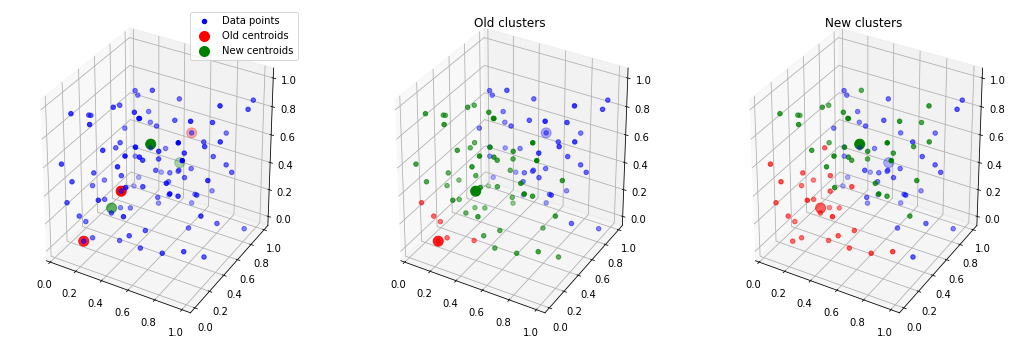

In [16]:
fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

ax1.scatter(X[:,0],X[:,1],X[:,2],color="blue", label="Data points")
ax1.scatter(C[:,0],C[:,1],C[:,2],color="red", s=100, label="Old centroids")
ax1.scatter(newC[:,0],newC[:,1],newC[:,2],color="green", s=100, label="New centroids")
ax1.legend()
ax2.scatter(X[:,0],X[:,1],X[:,2],c=labels,cmap=clr.ListedColormap(colors))
ax2.scatter(C[:,0],C[:,1],C[:,2],c=[0,1,2], s=100,cmap=clr.ListedColormap(colors))
ax2.set_title("Old clusters")
ax3.scatter(X[:,0],X[:,1],X[:,2],c=newLabels,cmap=clr.ListedColormap(colors))
ax3.scatter(newC[:,0],newC[:,1],newC[:,2],c=[0,1,2], s=100,cmap=clr.ListedColormap(colors))
ax3.set_title("New clusters")

In [17]:
testPoints = 10
Xtest = np.random.rand(testPoints,dimensions)
Xtest

array([[0.39721597, 0.29033177, 0.81774222],
       [0.54482728, 0.02431903, 0.76143499],
       [0.61710203, 0.49335248, 0.41207504],
       [0.48037579, 0.56487694, 0.25830642],
       [0.70276447, 0.79979795, 0.68258083],
       [0.76033563, 0.99594226, 0.79820077],
       [0.47895051, 0.67849307, 0.33173364],
       [0.89736367, 0.02102251, 0.06596599],
       [0.43212931, 0.40652196, 0.99273727],
       [0.04877313, 0.47155451, 0.05245276]])

In [18]:
newLabels

array([0, 2, 2, 0, 1, 1, 2, 2, 0, 2, 2, 2, 0, 1, 2, 2, 0, 2, 0, 2, 1, 0,
       0, 2, 1, 0, 1, 0, 2, 1, 2, 1, 0, 1, 1, 1, 2, 1, 1, 2, 1, 2, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2, 0, 2, 0, 2, 2, 2, 0, 0, 2, 1, 1, 2, 0, 2,
       1, 0, 1, 1, 2, 1, 1, 2, 1, 1, 2, 0, 0, 2, 1, 0, 2, 1, 2, 1, 1, 1,
       2, 2, 1, 1, 0, 2, 2, 2, 1, 0, 2, 2], dtype=int64)

In [19]:
testLabels = kNN(3, Xtest, X, newLabels)

Text(0.5, 0.92, 'New clusters')

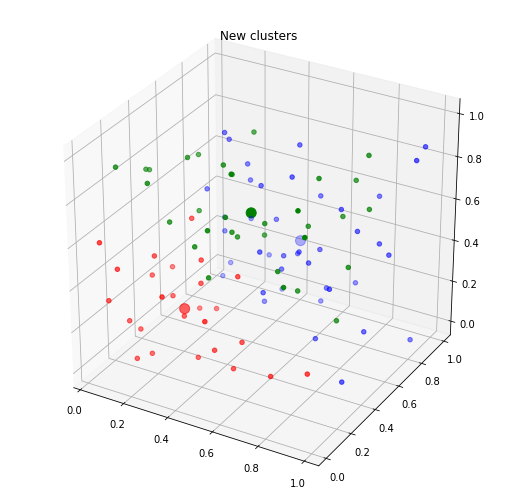

In [22]:
fig = plt.figure(figsize=(9,9))
ax1 = fig.add_subplot(111, projection='3d')

ax1.scatter(X[:,0],X[:,1],X[:,2],c=newLabels,cmap=clr.ListedColormap(colors))
ax1.scatter(newC[:,0],newC[:,1],newC[:,2],c=[0,1,2], s=100,cmap=clr.ListedColormap(colors))
# ax1.scatter(Xtest[:,0], Xtest[:,1], Xtest[:,2], c=testLabels, s = 300, cmap=clr.ListedColormap(colors))
ax1.set_title("New clusters")